Mohammad Mahdi Mirza Ali Mohammadi (Hamed Mohammadi)

 The dataset is available on google drive and can be accessed by following the link below
 https://drive.google.com/drive/folders/1mQb08oG0IujOFR0w9JYHtVX8V5jZGVuk?usp=sharing

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import time

# Build a model based on monileNet

In [ ]:
# create an object from MobileNet class
mobile = tf.keras.applications.mobilenet.MobileNet()

# you can check the model structure by running this code
# mobile.summary()

# adjust the model for the desired application
x = mobile.layers[-2].output # remove the last layer
output = Dense(units=2, activation='softmax')(x) # add a fully connected layer with output shape of 2
model = Model(inputs=mobile.input, outputs=output) # build the model

# make some layers non-trainable
for layer in model.layers[:-22]:
    layer.trainable = False

# compile the model with adam optimizer 
# learning rate = 0.0001
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

# Data preparation

In [ ]:
train_path = '/content/drive/MyDrive/Colab_Notebooks/covid_19/personal_model/personal_dataset/train'
valid_path = '/content/drive/MyDrive/Colab_Notebooks/covid_19/personal_model/personal_dataset/valid'

# prepare train samples (209 samples in 2 classes)
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
    ).flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=10)

# prepare validation samples (60 samples in 2 classes)
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
    ).flow_from_directory(
    directory=valid_path, 
    target_size=(224,224), 
    batch_size=10)


Found 209 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


# Train(fit) the mode
Time library is used to measure train time

Number of epoches is set experimentally

In [ ]:
start_time = time.time()

results = model.fit(x=train_batches,
                    steps_per_epoch=len(train_batches),
                    validation_data=valid_batches,
                    validation_steps=len(valid_batches),
                    epochs=20,
                    verbose=2
                    )

end_time = time.time()
train_runtime = end_time - start_time

Epoch 1/20
21/21 - 100s - loss: 0.1929 - accuracy: 0.9474 - val_loss: 0.0360 - val_accuracy: 0.9833 - 100s/epoch - 5s/step
Epoch 2/20
21/21 - 27s - loss: 0.1484 - accuracy: 0.9856 - val_loss: 0.1524 - val_accuracy: 0.9500 - 27s/epoch - 1s/step
Epoch 3/20
21/21 - 29s - loss: 0.0138 - accuracy: 0.9904 - val_loss: 0.1637 - val_accuracy: 0.9667 - 29s/epoch - 1s/step
Epoch 4/20
21/21 - 30s - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4734 - val_accuracy: 0.8833 - 30s/epoch - 1s/step
Epoch 5/20
21/21 - 30s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9833 - 30s/epoch - 1s/step
Epoch 6/20
21/21 - 24s - loss: 2.6901e-04 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 0.9833 - 24s/epoch - 1s/step
Epoch 7/20
21/21 - 25s - loss: 0.1272 - accuracy: 0.9665 - val_loss: 0.1366 - val_accuracy: 0.9833 - 25s/epoch - 1s/step
Epoch 8/20
21/21 - 25s - loss: 0.0058 - accuracy: 0.9952 - val_loss: 0.1809 - val_accuracy: 0.9500 - 25s/epoch - 1s/step
Epoch 9/20
21/21 - 29s - l

In [ ]:
print('training time : ',train_runtime, 'seconds')

training time :  745.4722301959991 seconds


In [ ]:
# to save the trained model run this
# model.save('/content/drive/MyDrive/new_covid19_binary_model')

# Loss and Accuracy figures

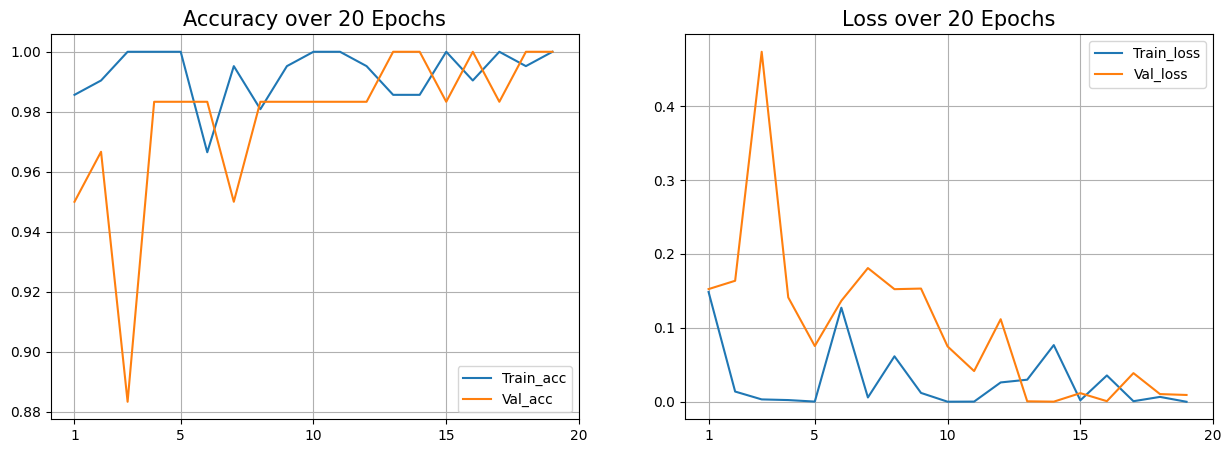

In [ ]:
# Plot the accuracy and loss graphs
import matplotlib.pyplot as plt

def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.xticks([1, 5, 10, 15, 20])
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.xticks([1, 5, 10, 15, 20])
    plt.show()
    
plot_acc_loss(results, 20)